## Проект по оценки стоимости домов в Калифорнии
### Переработка и перевод проекта из [книги](https://www.ozon.ru/product/prikladnoe-mashinnoe-obuchenie-s-pomoshchyu-scikit-learn-i-tensorflow-kontseptsii-instrumenty-144106127/?sh=2BNibf6rEA) 

[GitHub оригинала](https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.read_csv('housing.csv.zip')
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

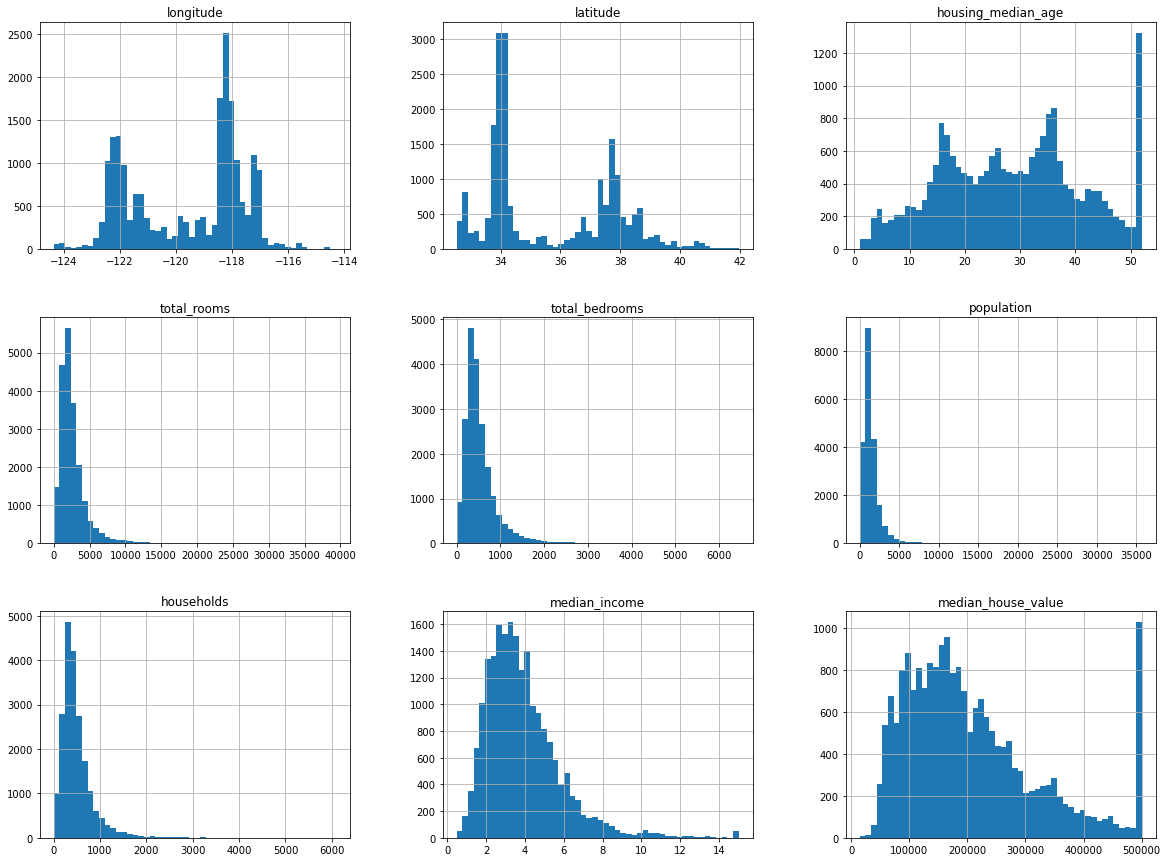

In [6]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

Обратите внимание:
1. Медианный доход (median_income) не выглядит выраженным в долларах США. Фактические данные были масштабированы и ограничены 15 (фактически 15.0001) для высших медианных доходов и 0.5 (фактически 0.4999) для низших медианных доходов.
2. Cредний возраст домов (housing_median_age) также ограничен возрастом до 50 и более лет.
3. Средняя стоимость домов (median_house_value) таже ограгничена стоимостью до и более 500 000$.
4. Разные масштабы данных (могут быть проблемой в дальнейшем).
5. Значительные хвосты в данных (тяжелые хвосты).

## Преобразование доходов

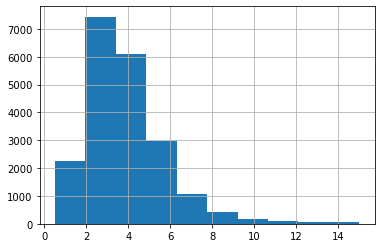

In [7]:
housing["median_income"].hist();

Выполним биннинг данных (в следующем семестре поговорим как это делать автоматически) для более удобного преобразования данных и разделения по категориям

In [8]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

  income_cat  
0          5  
1          5  
2          5  
3          4  
4          3

Посмотрим как наши данные разделились по категориям

In [9]:
housing["income_cat"].value_counts() 

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [10]:
housing["income_cat"].value_counts()/ len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [11]:
cat_plot = (housing["income_cat"].value_counts() / len(housing)).to_frame()
cat_plot

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826

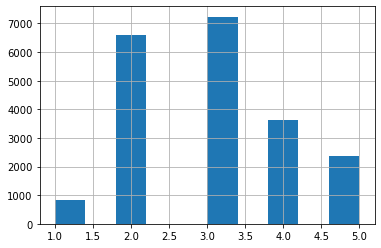

In [12]:
housing["income_cat"].hist();

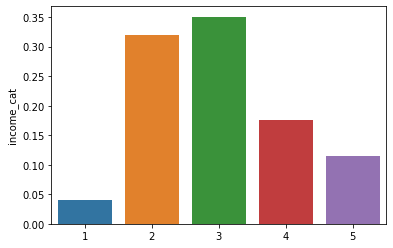

In [13]:
sns.barplot(x = cat_plot.index, y = cat_plot['income_cat']);

## Визуализация данных на географических картах

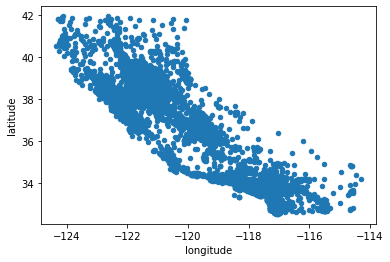

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude");

Очертания вполне напоминают Калифорнию, но трудно разглядеть конкретный области высокой плотности. Установка параметра alpha = О.1 значительно облегчает обнаружение мест, где имеется высокая плотность точек данных.

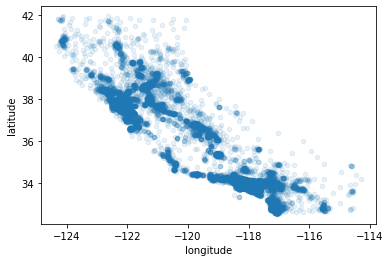

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1);

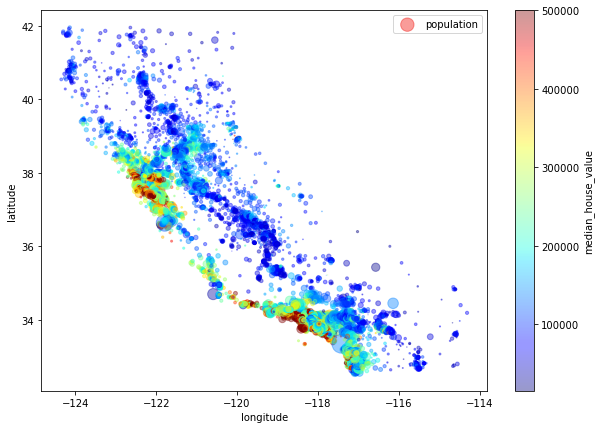

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

In [17]:
housing.sort_values(by=["population"])

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5342     -118.44     34.04                16.0         18.0             6.0   
12458    -114.62     33.62                26.0         18.0             3.0   
3126     -117.79     35.21                 4.0          2.0             2.0   
12286    -116.95     33.86                 1.0          6.0             2.0   
18210    -122.06     37.39                26.0         18.0             4.0   
...          ...       ...                 ...          ...             ...   
6057     -117.78     34.03                 8.0      32054.0          5290.0   
10309    -117.74     33.89                 4.0      37937.0          5471.0   
13139    -121.44     38.43                 3.0      39320.0          6210.0   
9880     -121.79     36.64                11.0      32627.0          6445.0   
15360    -117.42     33.35                14.0      25135.0          4819.0   

       population  households  median_income  median_house_value  \
5342          3.0         4.0         0.5360            350000.0   
12458         5.0         3.0         0.5360            275000.0   
3126          6.0         2.0         2.3750            137500.0   
12286         8.0         2.0         1.6250             55000.0   
18210         8.0         4.0         3.7500            375000.0   
...           ...         ...            ...                 ...   
6057      15507.0      5050.0         6.0191            253900.0   
10309     16122.0      5189.0         7.4947            366300.0   
13139     16305.0      5358.0         4.9516            153700.0   
9880      28566.0      6082.0         2.3087            118800.0   
15360     35682.0      4769.0         2.5729            134400.0   

      ocean_proximity income_cat  
5342        <1H OCEAN          1  
12458          INLAND          1  
3126           INLAND          2  
12286          INLAND          2  
18210        NEAR BAY          3  
...               ...        ...  
6057        <1H OCEAN          5  
10309       <1H OCEAN          5  
13139          INLAND          4  
9880        <1H OCEAN          2  
15360       <1H OCEAN          2  

[20640 rows x 11 columns]

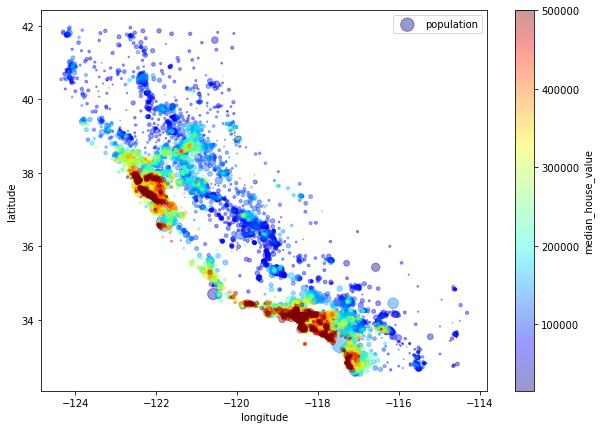

In [18]:
# Способ улучшить даные на графике, места высокой плотности

hous = housing.sort_values(by=["median_house_value"],ascending=True)

hous.plot(kind="scatter", 
          x = "longitude", y = "latitude", alpha = 0.4,
          s = hous["population"]/100, 
          label="population", 
          figsize=(10,7),
          c = "median_house_value", 
          cmap=plt.get_cmap("jet"), 
          colorbar=True,
          sharex=False
         )
plt.legend();

In [19]:
import plotly.graph_objects as go
fig = go.Figure(go.Densitymapbox(
            lat=hous.latitude, 
            lon=hous.longitude, 
            z=hous["population"],
            radius=5))

fig.update_layout(height=800,mapbox_style="stamen-terrain", mapbox_center_lon=-120)
fig.show()

In [20]:
import plotly.graph_objects as go
fig = go.Figure(go.Densitymapbox(
            lat=hous.latitude, 
            lon=hous.longitude, 
            z=hous["median_house_value"],
            radius=1))

fig.update_layout(height=800,mapbox_style="stamen-terrain", mapbox_center_lon=-120)
fig.show()

## Взглянем на корреляцию

In [21]:
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<AxesSubplot:>

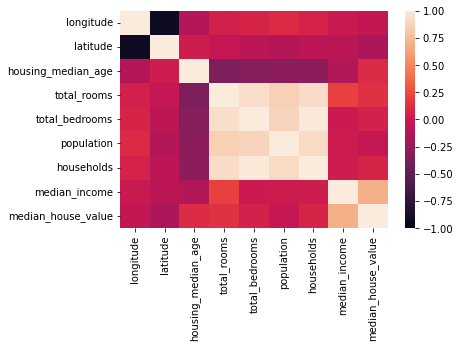

In [22]:
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns,
        vmin=-1, vmax=1)

In [23]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


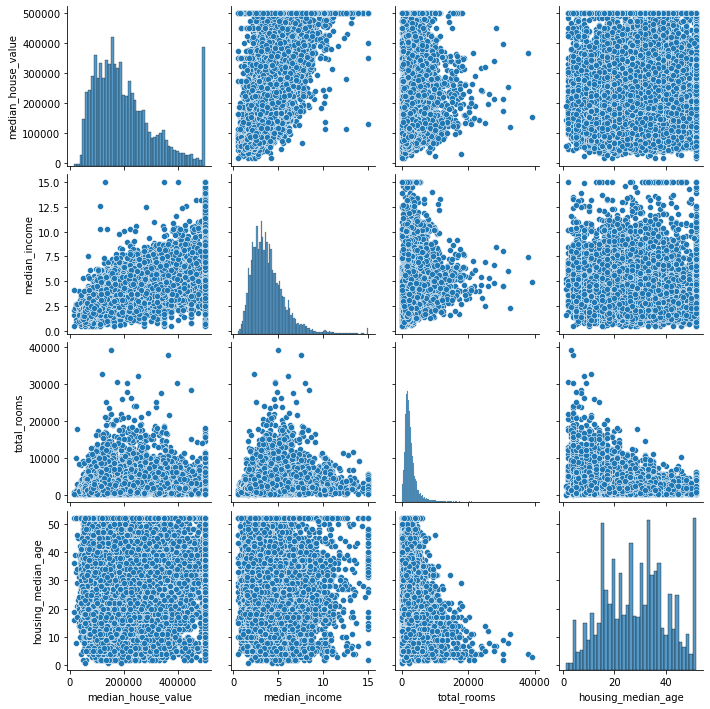

In [28]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

sns.pairplot(housing[attributes])
